### Kết nối drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Code

/content/drive/MyDrive/Code


### Data:


In [3]:
import yfinance as yf
from datetime import datetime

#### Lấy dữ liệu chứng khoán từ thư viện yahoo finance 
`Thời gian: 2000-01-01 đến ngày hiện tại`

In [ ]:
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

In [ ]:
acer = yf.download('2353.TW', start=start_date, end=end_date)  # Acer Inc: công ty máy tính Đài Loan
TSMC = yf.download('2330.TW', start=start_date, end=end_date) # TSMC: công ty sản xuất chip Đài Loan
AUO = yf.download('2409.TW', start=start_date, end=end_date) # AUO: công ty sản xuất màn hình Đài Loan

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Lưu dữ liệu vào file csv
acer.to_csv('acer.csv')
TSMC.to_csv('TSMC.csv')
AUO.to_csv('AUO.csv')

### import thư viện

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
 
from tensorflow.python.ops import control_flow_ops # thư viện điều khiển luồng dữ liệu


In [ ]:
print(tf.__version__)

2.12.0


### Đọc dữ liệu và tiền xử lý dữ liệu

In [ ]:
# Đọc dữ liệu từ file csv
df_TSMC = pd.read_csv('TSMC.csv')
df_acer = pd.read_csv('acer.csv')
df_AUO = pd.read_csv('AUO.csv')

# Độ dài của 3 bộ dữ liệu
len(df_acer), len(df_TSMC), len(df_AUO)

(5769, 5834, 5656)

*Lấy cột dữ liệu Close*
`Close: giá đóng cửa của cổ phiếu`
- Dùng để dự đoán giá đóng cửa của cổ phiếu

In [ ]:
p = df_acer['Close'].values.astype('float32')

###Visualization
`Stock target choose`

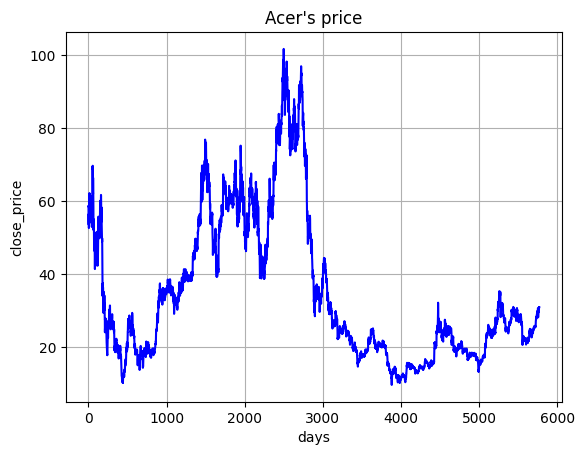

In [ ]:
plt.plot(p, color='blue')
plt.title("Acer's price")
plt.ylabel('close_price')
plt.xlabel('days')
plt.grid()
plt.show()

In [ ]:
# n là số lượng phần tử của mảng p
# z là mảng chứa các phần tử của p sau khi trừ cho phần tử liền sau nó
n = len(p)
z = np.array([p[i+1] - p[i] for i in range(n-1)])
print(z.shape)

(5768,)


In [ ]:
# m là số lượng giá trị đầu vào
# ts là số lượng bước thời gian 
# c là chi phí giao dịch
m = 50  # no of price ticks[inputs]
ts = n - m  # time steps
c = 0  # transaction cost 

# batch_size: số lượng mẫu dữ liệu được đưa vào mạng tính toán trong một lần
# numClusters: số lượng cụm
batch_size = 5 
numClusters = 3

Hàm `create_batch_generator` là một hàm tạo trình tạo batch cho dữ liệu đầu vào `X` với kích thước batch mặc định là `20`. <br>
Hàm này sẽ tạo ra một bản sao của `X` và sử dụng vòng lặp để chia `X` thành các batch nhỏ hơn. <br>
Mỗi lần lặp, hàm sẽ trả về một tuple gồm hai phần tử: batch hiện tại và phần tử cuối cùng của batch tiếp theo.


In [ ]:
def create_batch_generator(X, batch_size=20):
    X_copy = np.array(X)
    for i in range(0, X.shape[0], batch_size):
        yield (X_copy[i:i+batch_size, :], X_copy[i+1:i+1+batch_size, -1])

### Khởi tạo và xây dựng đồ thị tf-graph1

In [ ]:
g1 = tf.Graph()

with g1.as_default():
    tf.compat.v1.set_random_seed(123)
    features = tf.compat.v1.placeholder(tf.float32, shape=[None], name='features')  
    l = tf.compat.v1.placeholder(tf.float32, shape=[None], name='l')
    with tf.compat.v1.variable_scope("data_pre"):
        def slice_data(features, l): 
            temp_list = []
            for i in range(1, ts + 1):
                f = tf.slice(features, [i - 1], [m])
                temp_list.append(f)
            l = tf.stack(temp_list)
            return l
        slice_l = slice_data(features, l)

        init = tf.compat.v1.global_variables_initializer()
        
# Thực thi g1 để tạo slice_z
with tf.compat.v1.Session(graph=g1) as sess:
    sess.run(init)
    slice_z = sess.run(slice_l, feed_dict={features: z, l: []})

### Khởi tạo và xây dựng đồ thị TF-Graph
`DRL không có FRDNN`

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]]
[ 0.          1.5307388  -0.69130325 -0.34564972 -0.29627228]
[1.8763924]
Batch Times :  589 Current_total_reward : 76.26692865168661
[ 0.13587281 -0.36314985  0.24688403  0.27174038 -0.07525723]
[[ 1.3587271e-03]
 [-1.0000000e+00]
 [ 2.4688349e-03]
 [ 2.7173967e-03]
 [-7.5257203e-04]]
[-0.69130325 -0.69129944  1.678875   -0.44440842  1.2838478 ]
[-0.6932973]
Batch Times :  590 Current_total_reward : 76.9602259782514
[-0.18898188  0.26545122  0.34674463 -0.3331287   0.46954915]
[[-0.00188982]
 [ 0.00265451]
 [ 1.        ]
 [-1.        ]
 [ 1.        ]]
[ 2.1726608  -0.29627228  1.9257698   0.34565353 -2.3208008 ]
[-1.5752239]
Batch Times :  591 Current_total_reward : 78.5354499009809
[-0.09375725  0.02097195 -0.15497255  0.77055043 -0.6135103 ]
[[-9.3757210e-04]
 [ 2.0971954e-04]
 [-1.5497240e-03]
 [ 1.0000000e+00]
 [-1.0000000e+00]]
[ 1.3826065   0.888813   -0.39502716  0.          0.09875488]
[0.000

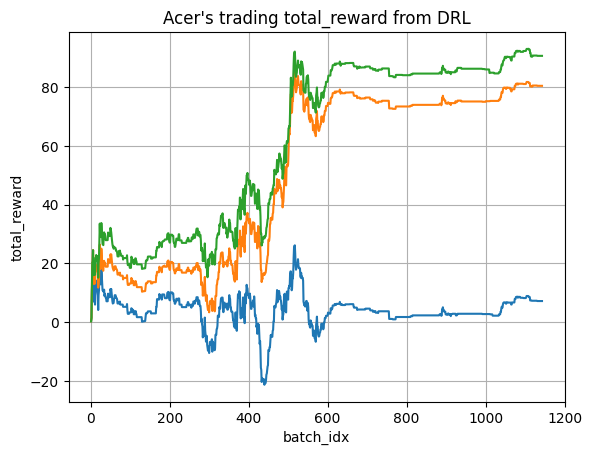

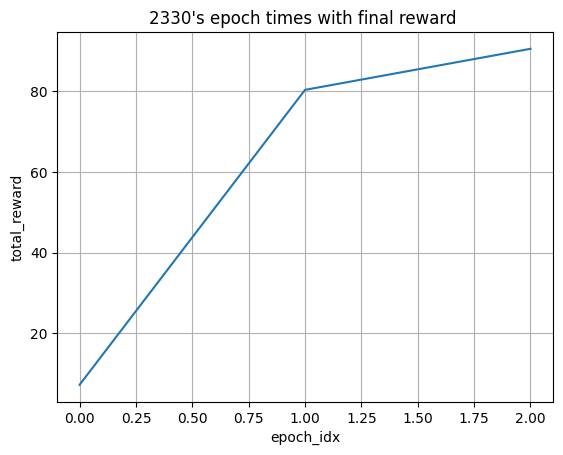

In [ ]:
g = tf.Graph() 

with g.as_default(): 
    tf.compat.v1.set_random_seed(123)
    # placeholder: tạo một vùng nhớ để lưu trữ dữ liệu đầu vào
    batch__X = tf.compat.v1.placeholder(tf.float32, shape=[None, 50], name='batch__X') # giá trị đầu vào
    next__z = tf.compat.v1.placeholder(tf.float32, shape=[None], name='next__z') # z tại thời điểm t+1

    # Tạo autoencoder: là một lớp ẩn, đầu vào là fuzzyOut, đầu ra là AE_out
    with tf.compat.v1.variable_scope("AutoEncoder"):
        h1 = tf.keras.layers.Dense(units=100, activation=tf.nn.leaky_relu)(batch__X)
        h2 = tf.keras.layers.Dense(units=60, activation=tf.nn.leaky_relu)(h1)
        h3 = tf.keras.layers.Dense(units=40, activation=tf.nn.leaky_relu)(h2)
        h4 = tf.keras.layers.Dense(units=30, activation=tf.nn.leaky_relu)(h3)
        AE_out = tf.keras.layers.Dense(units=10)(h4)

    # DRL: Deep Reinforcement Learning
    # delta được tính bằng công thức (8) trong paper
    with tf.compat.v1.variable_scope("DRL"):
        rnn_In = tf.reshape(tensor=AE_out, shape=[1, batch_size, 10], name="reshape1")
        rnn_cell = tf.keras.layers.SimpleRNNCell(units=1, activation=tf.tanh)
        initial_state = rnn_cell.get_initial_state(batch_size=1, dtype=tf.float32)
        delta, final_state = tf.compat.v1.nn.dynamic_rnn(rnn_cell, rnn_In, initial_state=initial_state, dtype=tf.float32, time_major=False)


        delta = tf.reshape(tensor=delta, shape=[batch_size]) # reshape delta về dạng (batch_size, 1)
        d = delta # d là delta sau khi reshape

        # đưa delta về dạng [-1, 1] bằng hàm tanh 
        delta = tf.map_fn(
            lambda x: tf.case(
                pred_fn_pairs=[
                    (tf.greater(x, 0.33), lambda: tf.math.tanh(x*100)),
                    (tf.less(x, -0.33), lambda: tf.math.tanh(x*100))],
                default=lambda: tf.math.tanh(x/100)), delta)

        delta = tf.reshape(tensor=delta, shape=[batch_size, 1]) 

    # Tính UT_loss 
    with tf.compat.v1.variable_scope("UT_loss"):
        # hàm tính UT 
        def cal_UT(delta, next__z):
            r = []
            for i in range(1, delta.shape[0]):
                Rt = delta[i - 1] * next__z[i - 1] - c * tf.abs(delta[i] - delta[i - 1]) # công thức (1) trong paper
                r.append(Rt) 
            UT = sum(r) 
            return UT 

        loss = (-1) * cal_UT(delta, next__z) # loss = (-1) * UT

    # Tạo optimizer để tối ưu hóa loss
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01) 
    # tạo train_op để thực hiện quá trình tối ưu hóa
    train_op = optimizer.minimize(loss=loss)
    # khởi tạo các biến trong graph g 
    init = tf.compat.v1.global_variables_initializer()

# thực thi graph g
with tf.compat.v1.Session(graph=g) as sess:
    sess.run(init) 
    each_epoch_total_reward = []
    epoch_times = []         
    for i in range(3):  # epoch = 20 
        epoch_total_reward = [] 
        batch_idx = []      
        count = 0
        current_total_loss = 0 
        batch_generator = create_batch_generator(slice_z, batch_size=batch_size)
        print("Epochs : ", i + 1)
        for batch_X, next_z in batch_generator:
            if batch_X.shape == (batch_size, 50):
                count += 1
                _, total_loss, d_out, delta_out, next_one = sess.run([train_op, loss, d, delta, next__z], feed_dict={batch__X: batch_X, next__z: next_z})
                print(d_out)
                print(delta_out) 
                print(next_one) 
                print(total_loss)

                current_total_loss += total_loss[0] # cộng dồn loss của một epoch 
                print("Batch Times : ", count, "Current_total_reward :", (-1) * current_total_loss) # in ra số lần lặp của một batch và tổng reward của một epoch
                epoch_total_reward.append((-1)*current_total_loss) # thêm tổng reward của một batch vào epoch_total_reward
                batch_idx.append(count) # thêm số lần lặp của một batch vào batch_idx

        each_epoch_total_reward.append((-1) * current_total_loss) # thêm tổng reward của một epoch vào each_epoch_total_reward
        epoch_times.append(i) # thêm số lần lặp của một epoch vào epoch_times 
        print("\n==================================================\n")

        plt.title("Acer's trading total_reward from DRL")
        plt.xlabel('batch_idx')
        plt.ylabel('total_reward')
        plt.plot(batch_idx, epoch_total_reward)
    plt.grid()
    plt.show()
    print("\n==================================================\n")
    plt.title("2330's epoch times with final reward ")
    plt.xlabel('epoch_idx')
    plt.ylabel('total_reward')
    plt.plot(epoch_times, each_epoch_total_reward)
    plt.grid()
    plt.show()

### Khởi tạo và xây dựng đồ thị TF-Graph
`FRDNN`

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Batch Times :  588 Current_total_reward : 401.4487644487963
[-0.9809109   0.6911541  -0.870221    0.48293206 -0.7751537 ]
[[-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]]
[ 0.          1.5307388  -0.69130325 -0.34564972 -0.29627228]
[-1.8763924]
Batch Times :  589 Current_total_reward : 403.32515681329824
[ 0.67110854 -0.9934386   0.44679496 -0.6510859   0.44422868]
[[ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]]
[-0.69130325 -0.69129944  1.678875   -0.44440842  1.2838478 ]
[-2.1232796]
Batch Times :  590 Current_total_reward : 405.44843638483144
[-0.9953719  -0.7105082   0.50286376 -0.77738917  0.7220781 ]
[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]]
[ 2.1726608  -0.29627228  1.9257698   0.34565353 -2.3208008 ]
[0.29627228]
Batch Times :  591 Current_total_reward : 405.1521641069994
[-0.7177258   0.2509756  -0.68479836 -0.20129694  0.11214491]
[[-1.        ]
 [ 0.00250975]
 [-1.        ]
 [-0.00201297]
 [ 0.00112145]]
[ 1.3826065   0.888813   -0.39502716  0.    

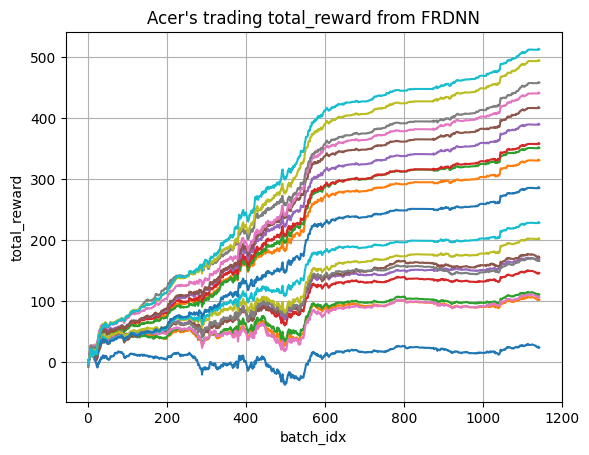

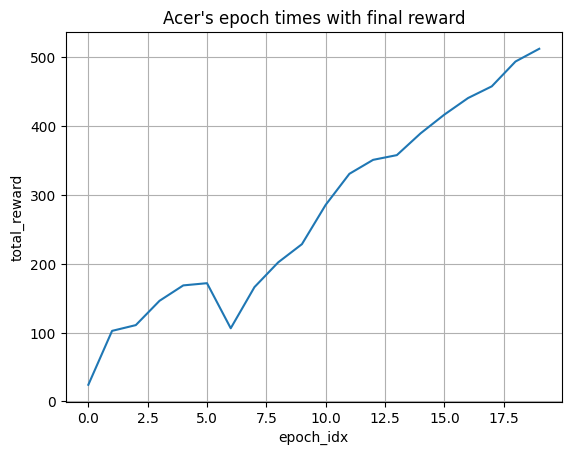

In [ ]:
g2 = tf.Graph() 

with g2.as_default(): 
    tf.compat.v1.set_random_seed(123)
    # placeholder: tạo một vùng nhớ để lưu trữ dữ liệu đầu vào
    batch__X = tf.compat.v1.placeholder(tf.float32, shape=[None, 50], name='batch__X') # giá trị đầu vào
    next__z = tf.compat.v1.placeholder(tf.float32, shape=[None], name='next__z') # z tại thời điểm t+1

    # Sử dụng k-means để phân cụm dữ liệu đầu vào để tạo fuzzy layer 
    with tf.compat.v1.variable_scope("k-means"):
        total_data = np.asarray(a=slice_z, dtype=np.float32) 
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
        flags = cv2.KMEANS_RANDOM_CENTERS  # chọn ngẫu nhiên tâm cụm
        compactness, label_kmeans, centers = cv2.kmeans(
            data=total_data, K=3, bestLabels=None, criteria=criteria, attempts=10, flags=flags)
        # Chia dữ liệu thành 3 loại
        List0 = [] 
        List1 = [] 
        List2 = [] 
        # Tính mean và variance của từng loại
        for ii in range(n-m):
            if 0 == label_kmeans[ii][0]: 
                List0.append(total_data[ii]) 
            if 1 == label_kmeans[ii][0]:
                List1.append(total_data[ii])
            if 2 == label_kmeans[ii][0]:
                List2.append(total_data[ii])
        mean0, variance0 = np.mean(List0, axis=0), np.var(List0, axis=0) 
        mean1, variance1 = np.mean(List1, axis=0), np.var(List1, axis=0)
        mean2, variance2 = np.mean(List2, axis=0), np.var(List2, axis=0)

    # # Tạo fuzzy layer: là một lớp ẩn, đầu vào là batch__X, đầu ra là fuzzyOut
    with tf.compat.v1.variable_scope("fuzzy-layer"):
        # lấy giá trị âm (chuẩn hóa) công thức (7) trong paper
        fuzzy0 = tf.exp(tf.negative(tf.nn.batch_normalization(x=batch__X, mean=mean0,
                                                              variance=variance0, offset=None, scale=None,
                                                              variance_epsilon=0.001)))
        fuzzy1 = tf.exp(tf.negative(tf.nn.batch_normalization(x=batch__X, mean=mean1,
                                                              variance=variance1, offset=None, scale=None,
                                                              variance_epsilon=0.001)))
        fuzzy2 = tf.exp(tf.negative(tf.nn.batch_normalization(x=batch__X, mean=mean2,
                                                              variance=variance2, offset=None, scale=None,
                                                              variance_epsilon=0.001)))
        fuzzyOut = tf.concat(values=[fuzzy0, fuzzy1, fuzzy2], axis=0, name="FuzzyOut")  # kết hợp 3 fuzzy layer
        fuzzyOut = tf.reshape(tensor=fuzzyOut, shape=[batch_size, 150])

    # Tạo autoencoder: là một lớp ẩn, đầu vào là fuzzyOut, đầu ra là AE_out
    with tf.compat.v1.variable_scope("AutoEncoder"):
        h1 = tf.keras.layers.Dense(units=100, activation=tf.nn.leaky_relu)(fuzzyOut)
        h2 = tf.keras.layers.Dense(units=60, activation=tf.nn.leaky_relu)(h1)
        h3 = tf.keras.layers.Dense(units=40, activation=tf.nn.leaky_relu)(h2)
        h4 = tf.keras.layers.Dense(units=30, activation=tf.nn.leaky_relu)(h3)
        AE_out = tf.keras.layers.Dense(units=10)(h4)

    # DRL: Deep Reinforcement Learning
    # delta được tính bằng công thức (8) trong paper
    with tf.compat.v1.variable_scope("DRL"):
        rnn_In = tf.reshape(tensor=AE_out, shape=[1, batch_size, 10], name="reshape1")
        rnn_cell = tf.keras.layers.SimpleRNNCell(units=1, activation=tf.tanh)
        initial_state = rnn_cell.get_initial_state(batch_size=1, dtype=tf.float32)
        delta, final_state = tf.compat.v1.nn.dynamic_rnn(rnn_cell, rnn_In, initial_state=initial_state, dtype=tf.float32, time_major=False)


        delta = tf.reshape(tensor=delta, shape=[batch_size]) # reshape delta về dạng (batch_size, 1)
        d = delta # d là delta sau khi reshape

        # đưa delta về dạng [-1, 1] bằng hàm tanh 
        delta = tf.map_fn(
            lambda x: tf.case(
                pred_fn_pairs=[
                    (tf.greater(x, 0.33), lambda: tf.math.tanh(x*100)),
                    (tf.less(x, -0.33), lambda: tf.math.tanh(x*100))],
                default=lambda: tf.math.tanh(x/100)), delta)

        delta = tf.reshape(tensor=delta, shape=[batch_size, 1]) 

    # Tính UT_loss 
    with tf.compat.v1.variable_scope("UT_loss"):
        # hàm tính UT 
        def cal_UT(delta, next__z):
            r = []
            for i in range(1, delta.shape[0]):
                Rt = delta[i - 1] * next__z[i - 1] - c * tf.abs(delta[i] - delta[i - 1]) # công thức (1) trong paper
                r.append(Rt) 
            UT = sum(r) 
            return UT 

        loss = (-1) * cal_UT(delta, next__z) # loss = (-1) * UT

    # Tạo optimizer để tối ưu hóa loss
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01) 
    # tạo train_op để thực hiện quá trình tối ưu hóa
    train_op = optimizer.minimize(loss=loss)
    # khởi tạo các biến trong graph g 
    init = tf.compat.v1.global_variables_initializer()

# thực thi graph g
with tf.compat.v1.Session(graph=g2) as sess:
    sess.run(init) 
    each_epoch_total_reward = []
    epoch_times = []         
    for i in range(20):  # epoch = 20 
        epoch_total_reward = [] 
        batch_idx = []      
        count = 0
        current_total_loss = 0 
        batch_generator = create_batch_generator(slice_z, batch_size=batch_size)
        print("Epochs : ", i + 1)
        for batch_X, next_z in batch_generator:
            if batch_X.shape == (batch_size, 50):
                count += 1
                _, total_loss, d_out, delta_out, next_one = sess.run([train_op, loss, d, delta, next__z], feed_dict={batch__X: batch_X, next__z: next_z})
                print(d_out)
                print(delta_out) 
                print(next_one) 
                print(total_loss)

                current_total_loss += total_loss[0] # cộng dồn loss của một epoch 
                print("Batch Times : ", count, "Current_total_reward :", (-1) * current_total_loss) # in ra số lần lặp của một batch và tổng reward của một epoch
                epoch_total_reward.append((-1)*current_total_loss) # thêm tổng reward của một batch vào epoch_total_reward
                batch_idx.append(count) # thêm số lần lặp của một batch vào batch_idx

        each_epoch_total_reward.append((-1) * current_total_loss) # thêm tổng reward của một epoch vào each_epoch_total_reward
        epoch_times.append(i) # thêm số lần lặp của một epoch vào epoch_times 
        print("\n==================================================\n")

        plt.title("Acer's trading total_reward from FRDNN")
        plt.xlabel('batch_idx')
        plt.ylabel('total_reward')
        plt.plot(batch_idx, epoch_total_reward)
    plt.grid()
    plt.show()
    print("\n==================================================\n")
    plt.title("Acer's epoch times with final reward")
    plt.xlabel('epoch_idx')
    plt.ylabel('total_reward')
    plt.plot(epoch_times, each_epoch_total_reward)
    plt.grid()
    plt.show()